#  Finding the average sizes of user requests for each user (in kWh) 

1. Group data set by the hour of arrival
2. Calculate average request size for each hour
3. Plot the change dynamic into a graph

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns

In [2]:
#changong data types to datetime format for users table
#dropping sessions with requests higher than 90 kWh (there are no cars with batteries bigger than 90 kWh)

users_to_clean = pd.read_csv('./data/users.csv')
users_to_clean['Modified'] = pd.to_datetime(users_to_clean.modifiedAt, infer_datetime_format=True)  
users_to_clean['Departure'] = pd.to_datetime(users_to_clean.requestedDeparture, infer_datetime_format=True)

users_drop = users_to_clean.drop(columns = ['requestedDeparture', 'modifiedAt', 'Unnamed: 0'])
users = users_drop[users_drop.kWhRequested <= 90]
users.head()

,WhPerMile,kWhRequested,milesRequested,minutesAvailable,paymentRequired,userID,Modified,Departure
0,350,59.5,170,550,True,22,2018-04-30 15:08:54+00:00,2018-05-01 00:17:49+00:00
1,400,8.0,20,60,True,61,2018-05-07 14:38:32+00:00,2018-05-07 15:38:18+00:00
2,400,8.0,20,648,True,61,2018-05-07 15:40:44+00:00,2018-05-08 01:26:18+00:00
3,400,28.0,70,648,True,61,2018-05-07 15:41:04+00:00,2018-05-08 01:26:18+00:00
4,350,17.5,50,546,True,22,2018-05-11 15:18:23+00:00,2018-05-12 00:23:01+00:00


In [50]:
#changing data types to datetime format for users table

charging_to_clean = pd.read_csv('./data/charging.csv')
charging_to_clean['ConnectionTime'] = pd.to_datetime(charging_to_clean.connectionTime, infer_datetime_format=True) 
charging_to_clean['DisconnectTime'] = pd.to_datetime(charging_to_clean.disconnectTime, infer_datetime_format=True) 
charging_to_clean['DoneCharging'] = pd.to_datetime(charging_to_clean.doneChargingTime, infer_datetime_format=True) 

charging = charging_to_clean.drop(columns = ['connectionTime', 'disconnectTime', 'doneChargingTime', 'Unnamed: 0'])
charging.head()

,_id,clusterID,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,ConnectionTime,DisconnectTime,DoneCharging
0,5bc90cb9f9af8b0d7fe77cd2,39,7.932,2_39_78_362_2018-04-25 11:08:04.400812,2,CA-496,2-39-78-362,America/Los_Angeles,NaN,2018-04-25 11:08:04+00:00,2018-04-25 13:20:10+00:00,2018-04-25 13:21:10+00:00
1,5bc90cb9f9af8b0d7fe77cd3,39,10.013,2_39_95_27_2018-04-25 13:45:09.617470,2,CA-319,2-39-95-27,America/Los_Angeles,NaN,2018-04-25 13:45:10+00:00,2018-04-26 00:56:16+00:00,2018-04-25 16:44:15+00:00
2,5bc90cb9f9af8b0d7fe77cd4,39,5.257,2_39_79_380_2018-04-25 13:45:49.962001,2,CA-489,2-39-79-380,America/Los_Angeles,NaN,2018-04-25 13:45:50+00:00,2018-04-25 23:04:45+00:00,2018-04-25 14:51:44+00:00
3,5bc90cb9f9af8b0d7fe77cd5,39,5.177,2_39_79_379_2018-04-25 14:37:06.460772,2,CA-327,2-39-79-379,America/Los_Angeles,NaN,2018-04-25 14:37:06+00:00,2018-04-25 23:55:34+00:00,2018-04-25 16:05:22+00:00
4,5bc90cb9f9af8b0d7fe77cd6,39,10.119,2_39_79_381_2018-04-25 14:40:33.638896,2,CA-490,2-39-79-381,America/Los_Angeles,NaN,2018-04-25 14:40:34+00:00,2018-04-25 23:03:12+00:00,2018-04-25 17:40:30+00:00


# Finding cars - model Smart

In [131]:
#finding userIDs for Smart cars - step 1
max_request = users[['userID', 'kWhRequested']].groupby(users.userID).max()
msk_Smart = (max_request.kWhRequested < 16.5)
smarts_ID_1 = max_request[msk_Smart].userID
smarts_ID_1

userID
1          1
17        17
75        75
183      183
190      190
        ... 
6435    6435
6481    6481
6606    6606
6623    6623
6638    6638
Name: userID, Length: 119, dtype: int64

In [181]:
#selecting user sessions with smarts_ID_1 cars
smarts_mask_u = users.userID.isin(smarts_ID_1)
smarts_u = users[smarts_mask]
smarts_u

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,WhPerMile,kWhRequested,milesRequested,minutesAvailable,paymentRequired,userID,Modified,Departure
2231,400,20.0,50,720,True,1286,2018-11-17 05:08:02+00:00,2018-11-17 16:46:44+00:00
3404,575,34.5,60,318,True,838,2018-12-13 01:20:04+00:00,2018-12-13 06:37:37+00:00
8801,400,8.0,20,487,True,743,2019-05-23 15:21:01+00:00,2019-05-23 23:27:29+00:00
8919,600,12.0,20,493,True,1366,2019-05-28 16:27:31+00:00,2019-05-29 00:33:41+00:00
9019,250,37.5,150,465,True,818,2019-05-31 15:15:45+00:00,2019-05-31 23:00:13+00:00
...,...,...,...,...,...,...,...,...
17122,290,5.8,20,120,True,1539,2020-06-21 23:33:26+00:00,2020-06-22 01:31:43+00:00
17123,400,28.0,70,496,True,710,2020-06-22 14:13:32+00:00,2020-06-22 22:29:19+00:00
17128,250,25.0,100,480,True,743,2020-06-26 16:20:23+00:00,2020-06-27 00:18:15+00:00
17131,283,28.3,100,480,True,1085,2020-06-28 21:18:14+00:00,2020-06-29 05:18:05+00:00


In [189]:
# selecting cars with proper WhPerMile 
max_WhPerMile = users[['userID', 'WhPerMile']].groupby(users.userID).max()
min_WhPerMile = users[['userID', 'WhPerMile']].groupby(users.userID).min()
msk_Smart_1 = (max_WhPerMile.WhPerMile < 340) & (min_WhPerMile.WhPerMile > 300)
smarts_ID_2 = max_WhPerMile[msk_Smart_1].userID
smarts_ID_2


userID
365      365
428      428
519      519
677      677
1297    1297
1725    1725
3831    3831
Name: userID, dtype: int64

In [198]:
#selecting charging sessions with smarts_ID_1 cars
smarts_mask = charging.userID.isin(smarts_ID_1)
smarts_charging = charging[smarts_mask]


# adding a filter by WhPerMile
smarts_mask_2 = smarts_charging.userID.isin(smarts_ID_2)
smarts_charging = smarts_charging[smarts_mask_2]
smarts_charging



,_id,clusterID,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,ConnectionTime,DisconnectTime,DoneCharging
13737,5c2e87f6f9af8b13dab0774e,39,1.666,2_39_130_31_2018-11-14 16:06:36.373346,2,CA-306,2-39-130-31,America/Los_Angeles,365.0,2018-11-14 16:06:36+00:00,2018-11-14 16:54:17+00:00,2018-11-14 16:48:26+00:00
13921,5c2e889df9af8b13dab07806,39,2.923,2_39_88_24_2018-11-18 19:21:15.467611,2,CA-314,2-39-88-24,America/Los_Angeles,365.0,2018-11-18 19:21:15+00:00,2018-11-18 20:12:41+00:00,2018-11-18 20:12:33+00:00
15002,5c2e8c45f9af8b13dab07c3f,39,4.278,2_39_131_30_2018-12-16 18:56:10.944349,2,CA-305,2-39-131-30,America/Los_Angeles,365.0,2018-12-16 18:56:11+00:00,2018-12-16 20:15:32+00:00,2018-12-16 20:15:27+00:00
15408,5c46721ff9af8b2d64cb23f9,39,2.308,2_39_131_30_2019-01-05 18:36:03.526833,2,CA-305,2-39-131-30,America/Los_Angeles,365.0,2019-01-05 18:36:04+00:00,2019-01-05 19:23:29+00:00,2019-01-05 19:23:22+00:00
15625,5c4fac9ff9af8b5b17248738,39,2.208,2_39_129_17_2019-01-12 17:24:15.830346,2,CA-307,2-39-129-17,America/Los_Angeles,365.0,2019-01-12 17:24:16+00:00,2019-01-12 18:03:58+00:00,2019-01-12 18:03:50+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
27783,5e7954b0f9af8b090600ec84,39,5.428,2_39_139_28_2020-03-08 01:19:32.578632,2,CA-303,2-39-139-28,America/Los_Angeles,365.0,2020-03-08 01:19:33+00:00,2020-03-08 02:56:21+00:00,2020-03-08 03:56:13+00:00
27855,5e7d4915f9af8b180cda61c5,39,4.540,2_39_130_31_2020-03-11 00:17:51.003635,2,CA-306,2-39-130-31,America/Los_Angeles,365.0,2020-03-11 00:17:51+00:00,2020-03-11 01:40:17+00:00,2020-03-11 01:40:14+00:00
27918,5e813d8ff9af8b23a8a39cfc,39,3.277,2_39_139_28_2020-03-14 00:35:56.114144,2,CA-303,2-39-139-28,America/Los_Angeles,365.0,2020-03-14 00:35:56+00:00,2020-03-14 01:36:33+00:00,2020-03-14 01:36:25+00:00
27923,5e828f0cf9af8b279cf8cf20,39,3.868,2_39_129_17_2020-03-15 00:57:31.406861,2,CA-307,2-39-129-17,America/Los_Angeles,365.0,2020-03-15 00:57:31+00:00,2020-03-15 02:04:23+00:00,2020-03-15 02:04:18+00:00


In [199]:
#selecting users with smarts_ID_1 cars
smarts_mask = users.userID.isin(smarts_ID_1)
smarts_users = users[smarts_mask]

# adding a filter by WhPerMile
smarts_mask_2 = smarts_users.userID.isin(smarts_ID_2)
smarts_users = smarts_users[smarts_mask_2]
smarts_users

,WhPerMile,kWhRequested,milesRequested,minutesAvailable,paymentRequired,userID,Modified,Departure
2068,333,3.33,10,60,True,365,2018-11-14 16:08:29+00:00,2018-11-14 17:06:36+00:00
2269,333,9.99,30,101,True,365,2018-11-18 19:22:27+00:00,2018-11-18 21:02:15+00:00
3541,333,9.99,30,100,True,365,2018-12-16 18:56:46+00:00,2018-12-16 20:36:11+00:00
3992,333,9.99,30,63,True,365,2019-01-05 18:36:50+00:00,2019-01-05 19:39:04+00:00
4212,333,9.99,30,122,True,365,2019-01-12 17:24:59+00:00,2019-01-12 19:26:16+00:00
...,...,...,...,...,...,...,...,...
16820,333,9.99,30,104,True,365,2020-03-08 01:19:51+00:00,2020-03-08 03:03:33+00:00
16905,333,9.99,30,104,True,365,2020-03-11 00:18:55+00:00,2020-03-11 02:01:51+00:00
16959,333,9.99,30,104,True,365,2020-03-14 00:36:12+00:00,2020-03-14 02:19:56+00:00
16964,333,9.99,30,104,True,365,2020-03-15 00:57:51+00:00,2020-03-15 02:41:31+00:00


In [197]:
smart_users = smarts_users.groupby(['userID'])
smart_users.describe().T 

userID                        365     3831
WhPerMile        count   96.000000    1.00
                 mean   333.000000  325.00
                 std      0.000000     NaN
                 min    333.000000  325.00
                 25%    333.000000  325.00
                 50%    333.000000  325.00
                 75%    333.000000  325.00
                 max    333.000000  325.00
kWhRequested     count   96.000000    1.00
                 mean     8.394375   16.25
                 std      2.365999     NaN
                 min      3.330000   16.25
                 25%      6.660000   16.25
                 50%      9.990000   16.25
                 75%      9.990000   16.25
                 max      9.990000   16.25
milesRequested   count   96.000000    1.00
                 mean    25.208333   50.00
                 std      7.105101     NaN
                 min     10.000000   50.00
                 25%     20.000000   50.00
                 50%     30.000000   50.00
                 75%     30.000000   50.00
                 max     30.000000   50.00
minutesAvailable count   96.000000    1.00
                 mean   100.104167   60.00
                 std     26.796496     NaN
                 min     60.000000   60.00
                 25%     81.750000   60.00
                 50%    104.000000   60.00
                 75%    104.000000   60.00
                 max    205.000000   60.00

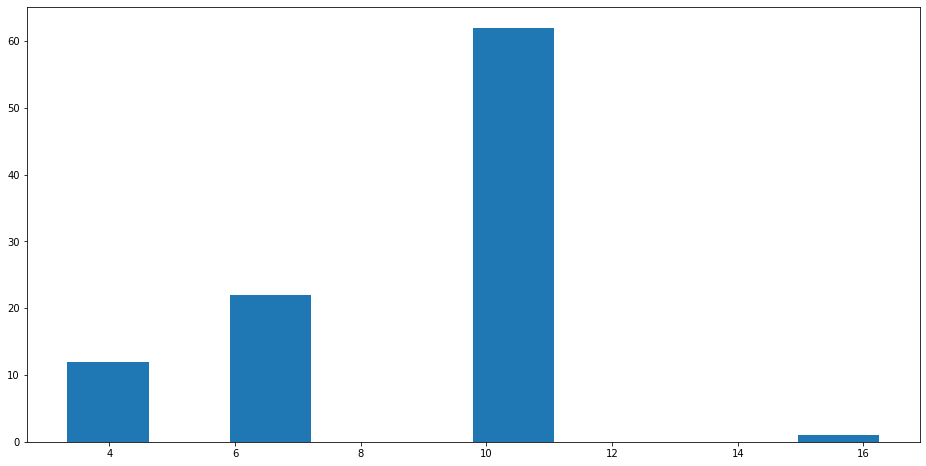

In [200]:
ax, fig = plt.subplots(figsize = (16, 8))
ax = plt.hist(smarts_users.kWhRequested)

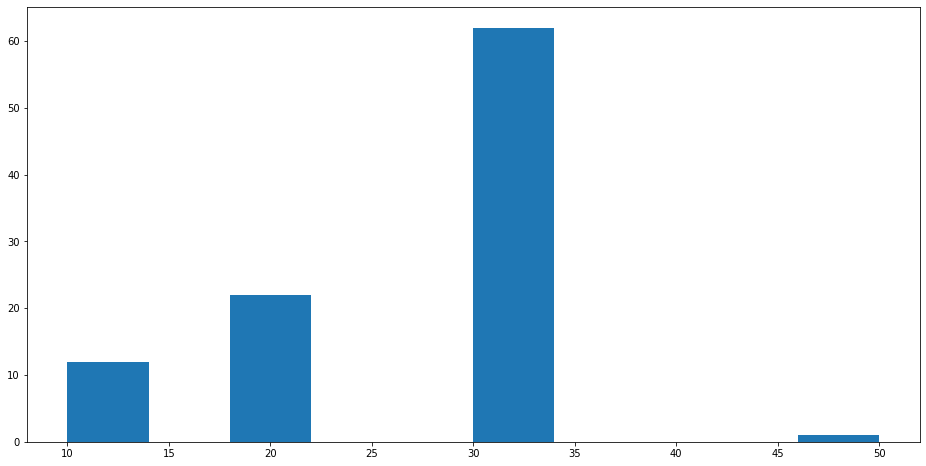

In [202]:
ax, fig = plt.subplots(figsize = (16, 8))
ax = plt.hist(smarts_users.milesRequested)

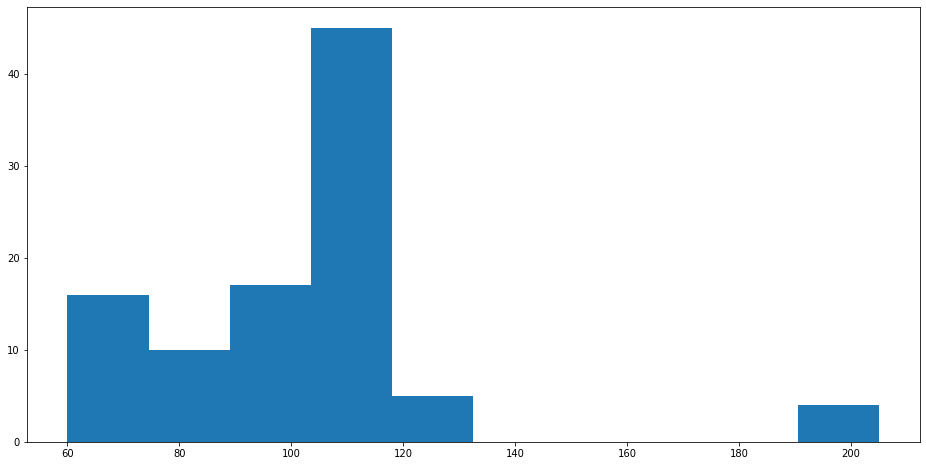

In [203]:
ax, fig = plt.subplots(figsize = (16, 8))
ax = plt.hist(smarts_users.minutesAvailable)

# Using bootstrapping to check out means distributions for smart drivrs miles requests

In [210]:
all_data = list(smarts_users.milesRequested)

In [205]:
def bootstrap_mean(data, n_samples = 10000):
    bootsrtap_means = []
    for i in range(n_samples):
        bootstrap_sample = np.random.choice(data, size = len(data), replace = True)
        bootsrtap_means.append(np.mean(bootstrap_sample))
    return bootsrtap_means


In [206]:
all_boot_means = bootstrap_mean(all_data)

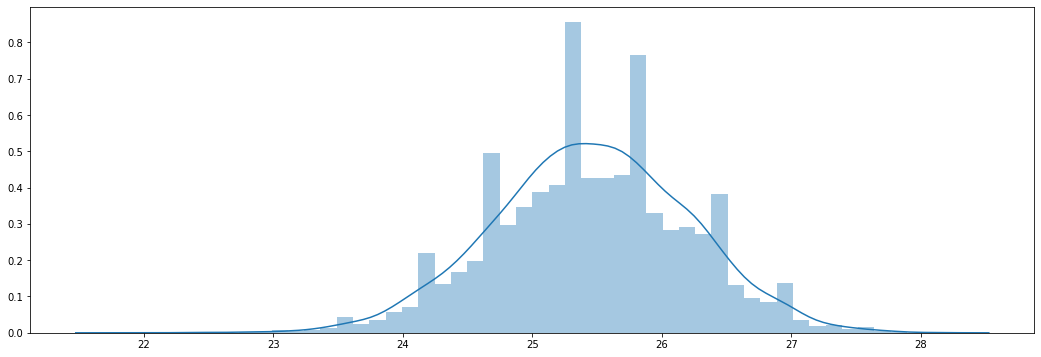

In [207]:
ax, fig = plt.subplots(figsize = (18, 6))
ax = sns.distplot(all_boot_means)
#ax = plt.hist(all_tesla_boot_means)

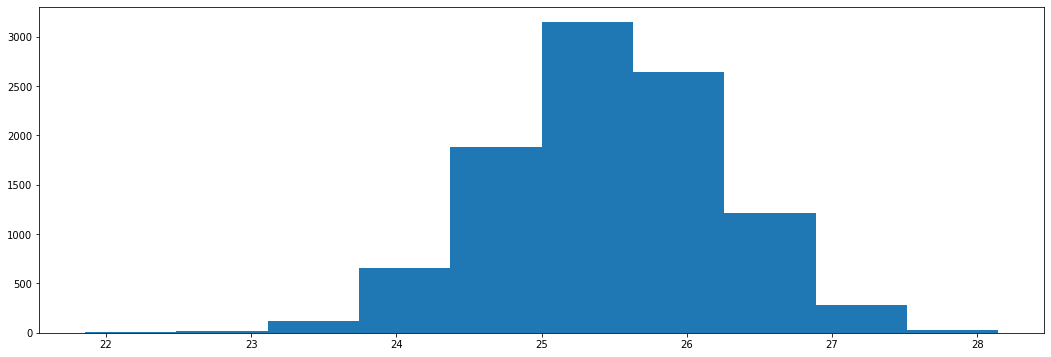

In [208]:
ax, fig = plt.subplots(figsize = (18, 6))
#ax = sns.distplot(all_tesla_boot_means)
ax = plt.hist(all_boot_means)

In [211]:
#variance of bootstrapped means for all tesla users
all_var = np.var(all_data) 
all_var_boot = np.var(all_boot_means)
boot_mean = np.mean(all_boot_means)

print('All Smart users sample mean: 25.20')
print(f'All Smart users bootsrtap sample mean: {boot_mean}')

print(f'Variance of all Smart users charge request: {all_var}')  #why the hell it is so big???
print(f'Variance of all Smart users means: {all_var_boot}')

All Smart users sample mean: 25.20
All Smart users bootsrtap sample mean: 25.454917525773197
Variance of all Smart users charge request: 55.71261558082686
Variance of all Smart users means: 0.5699827687320649


In [212]:
#confidence interval for all tesla users
left = np.percentile(all_boot_means, 2.5)
right = np.percentile(all_boot_means, 97.5)
left, right

(23.917525773195877, 26.90721649484536)

# Using bootstrapping to check out means distributions for smartdrivrs kWh requests

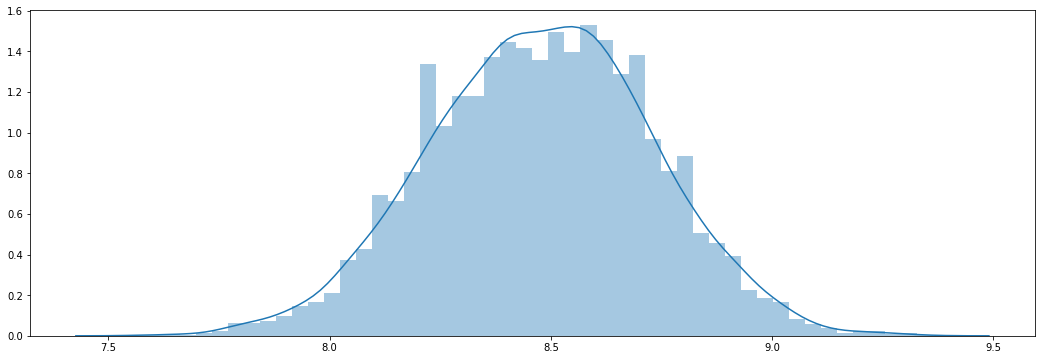

In [213]:
all_data_kWh = list(smarts_users.kWhRequested)
all_kWh_boot_means = bootstrap_mean(all_data_kWh)

ax, fig = plt.subplots(figsize = (18, 6))
ax = sns.distplot(all_kWh_boot_means

In [215]:
#variance of bootstrapped means for all smart users
all_var_kWh = np.var(all_data_kWh)
all_var_boot_kWh = np.var(all_kWh_boot_means)
boot_mean_kWh = np.mean(all_kWh_boot_means)

print('All Smart users sample mean: 8.39')
print(f'All Smart users bootsrtap sample mean: {boot_mean_kWh}')

print(f'Variance of all Smart users charge request: {all_var_kWh}')
print(f'Variance of all Smart users means: {all_var_boot_kWh}')

All Smart users sample mean: 8.39
All Smart users bootsrtap sample mean: 8.477955536082474
Variance of all Smart users charge request: 6.112163014135403
Variance of all Smart users means: 0.06289429996216714


In [216]:
## finding bootsrtap confidence interval for the sample mean

In [217]:
left = np.percentile(all_kWh_boot_means, 15)
right = np.percentile(all_kWh_boot_means, 85)
left, right

(8.204845360824741, 8.745876288659792)

# Using bootstrapping to check out means distributions for smart kWhDelivered 

In [221]:
smarts_charging.describe()

,clusterID,kWhDelivered,siteID,userID
count,96.0,96.000000,96.0,96.000000
mean,39.0,2.865427,2.0,401.104167
std,0.0,1.609454,0.0,353.747144
min,39.0,0.544000,2.0,365.000000
25%,39.0,1.703750,2.0,365.000000
50%,39.0,2.470500,2.0,365.000000
75%,39.0,4.117750,2.0,365.000000
max,39.0,12.636000,2.0,3831.000000


In [223]:
smarts_charging.T

,13737,13921,15002,15408,15625,15892,16339,17947,18172,18399,...,27237,27377,27456,27575,27660,27783,27855,27918,27923,27933
_id,5c2e87f6f9af8b13dab0774e,5c2e889df9af8b13dab07806,5c2e8c45f9af8b13dab07c3f,5c46721ff9af8b2d64cb23f9,5c4fac9ff9af8b5b17248738,5c58e724f9af8b7c30139e54,5c6b5c23f9af8b336a126dda,5cabe791f9af8b0a29d80e80,5cb673cbf9af8b4ced04ad97,5cbfae0df9af8b1c4fdea9f4,...,5e644ab5f9af8b246133870e,5e66df90f9af8b2abde9d6eb,5e6c25c3f9af8b3cc2917738,5e701a0df9af8b4841ae7d57,5e740e9ff9af8b7848854fe1,5e7954b0f9af8b090600ec84,5e7d4915f9af8b180cda61c5,5e813d8ff9af8b23a8a39cfc,5e828f0cf9af8b279cf8cf20,5e83e091f9af8b2b6eaaeaf0
clusterID,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
kWhDelivered,1.666,2.923,4.278,2.308,2.208,2.478,1.77,2.876,4.501,2.472,...,1.254,1.399,1.283,3.297,4.572,5.428,4.54,3.277,3.868,2.073
sessionID,2_39_130_31_2018-11-14 16:06:36.373346,2_39_88_24_2018-11-18 19:21:15.467611,2_39_131_30_2018-12-16 18:56:10.944349,2_39_131_30_2019-01-05 18:36:03.526833,2_39_129_17_2019-01-12 17:24:15.830346,2_39_126_20_2019-01-19 20:07:16.554058,2_39_131_30_2019-02-02 17:00:04.686332,2_39_130_31_2019-03-23 23:22:35.010196,2_39_138_29_2019-03-31 23:35:22.093959,2_39_131_30_2019-04-08 00:12:59.231387,...,2_39_131_30_2020-02-19 01:21:10.471513,2_39_129_17_2020-02-22 18:56:06.078099,2_39_128_18_2020-02-26 01:17:16.767905,2_39_131_30_2020-02-29 17:37:13.423046,2_39_139_28_2020-03-04 01:14:31.692921,2_39_139_28_2020-03-08 01:19:32.578632,2_39_130_31_2020-03-11 00:17:51.003635,2_39_139_28_2020-03-14 00:35:56.114144,2_39_129_17_2020-03-15 00:57:31.406861,2_39_129_17_2020-03-16 00:33:03.447051
siteID,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
spaceID,CA-306,CA-314,CA-305,CA-305,CA-307,CA-310,CA-305,CA-306,CA-304,CA-305,...,CA-305,CA-307,CA-308,CA-305,CA-303,CA-303,CA-306,CA-303,CA-307,CA-307
stationID,2-39-130-31,2-39-88-24,2-39-131-30,2-39-131-30,2-39-129-17,2-39-126-20,2-39-131-30,2-39-130-31,2-39-138-29,2-39-131-30,...,2-39-131-30,2-39-129-17,2-39-128-18,2-39-131-30,2-39-139-28,2-39-139-28,2-39-130-31,2-39-139-28,2-39-129-17,2-39-129-17
timezone,America/Los_Angeles,America/Los_Angeles,America/Los_Angeles,America/Los_Angeles,America/Los_Angeles,America/Los_Angeles,America/Los_Angeles,America/Los_Angeles,America/Los_Angeles,America/Los_Angeles,...,America/Los_Angeles,America/Los_Angeles,America/Los_Angeles,America/Los_Angeles,America/Los_Angeles,America/Los_Angeles,America/Los_Angeles,America/Los_Angeles,America/Los_Angeles,America/Los_Angeles
userID,365,365,365,365,365,365,365,365,365,365,...,365,365,365,365,365,365,365,365,365,365
ConnectionTime,2018-11-14 16:06:36+00:00,2018-11-18 19:21:15+00:00,2018-12-16 18:56:11+00:00,2019-01-05 18:36:04+00:00,2019-01-12 17:24:16+00:00,2019-01-19 20:07:17+00:00,2019-02-02 17:00:05+00:00,2019-03-23 23:22:35+00:00,2019-03-31 23:35:22+00:00,2019-04-08 00:12:59+00:00,...,2020-02-19 01:21:10+00:00,2020-02-22 18:56:06+00:00,2020-02-26 01:17:17+00:00,2020-02-29 17:37:13+00:00,2020-03-04 01:14:32+00:00,2020-03-08 01:19:33+00:00,2020-03-11 00:17:51+00:00,2020-03-14 00:35:56+00:00,2020-03-15 00:57:31+00:00,2020-03-16 00:33:03+00:00


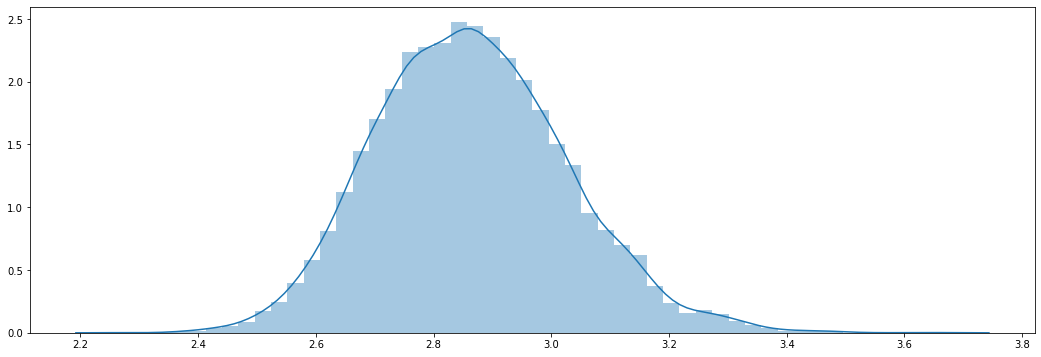

In [220]:
all_data_kWhDelivered = list(smarts_charging.kWhDelivered)
all_kWhDelivered_boot_means = bootstrap_mean(all_data_kWhDelivered)

ax, fig = plt.subplots(figsize = (18, 6))
ax = sns.distplot(all_kWhDelivered_boot_means)

In [226]:
#variance of bootstrapped means for all smart users sessions (kWhDelivered)
all_var_kWh = np.var(all_data_kWhDelivered)
all_var_boot_kWh = np.var(all_kWhDelivered_boot_means)
boot_mean_kWh = np.mean(all_kWhDelivered_boot_means)

print('All Smart kWhDelivered sample mean: 2.86')
print(f'All Smart kWhDelivered bootsrtap sample mean: {boot_mean_kWh}')

print(f'Variance of all Smart  kWhDelivered: {all_var_kWh}')
print(f'Variance of all Smart kWhDelivered means: {all_var_boot_kWh}')

All Smart kWhDelivered sample mean: 2.86
All Smart kWhDelivered bootsrtap sample mean: 2.8645983239583335
Variance of all Smart  kWhDelivered: 2.5633588696831597
Variance of all Smart kWhDelivered means: 0.02633875901674166


In [227]:
## finding bootsrtap confidence interval for the sample mean

In [228]:
left = np.percentile(all_kWhDelivered_boot_means, 15)
right = np.percentile(all_kWhDelivered_boot_means, 85)
left, right

(2.697475520833334, 3.0299125)